# Table of Contents

## 01. Importing Libraries and Dataframe

## 02. Wrangling Data

## 03. Line Chart 

## 04. Decomposition

## 05. Check for Stationarity

## 06. Autocorrelation

---

## 01. Importing Libraries and Dataframe

In [10]:
# importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [11]:
# create path 
path= r'C:\Users\marze\Gun Violence'

In [12]:
# import dataframe
gv_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '6.4_gun_violence_cleaned.csv'))

---

## 02. Wrangling Data

In [15]:
gv_df.head()

,Unnamed: 0,Incident_ID,Date,Year,Month,Day,State,City or County,Number Killed,Number Injured,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,0,4,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,1,460726,2013-01-01,2013,1,1,California,Hawthorne,1,3,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1,3,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,3,478925,2013-01-05,2013,1,5,Colorado,Aurora,4,0,...,NaN,NaN,0,0,4,4,3,1,3,1
4,4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,2,2,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1


In [16]:
# drop unnamed column
gv_df = gv_df.drop(columns = ['Unnamed: 0'])

In [17]:
gv_df.head()

,Incident_ID,Date,Year,Month,Day,State,City or County,Number Killed,Number Injured,Number of Guns Involved,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,0,4,NaN,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,460726,2013-01-01,2013,1,1,California,Hawthorne,1,3,NaN,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1,3,2.0,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,478925,2013-01-05,2013,1,5,Colorado,Aurora,4,0,NaN,...,NaN,NaN,0,0,4,4,3,1,3,1
4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,2,2,2.0,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1


In [18]:
# check column names
gv_df.columns

Index(['Incident_ID', 'Date', 'Year', 'Month', 'Day', 'State',
       'City or County', 'Number Killed', 'Number Injured',
       'Number of Guns Involved', 'Incident Characteristics',
       'Congressional District', 'Latitude', 'Longitude', 'Location Combined',
       'Location Description', 'Notes', 'Child Participants 0-11',
       'Teen Participants 12-17', 'Adult Participants 18+',
       'Total Participants', 'Male Participants', 'Female Participants',
       'Victim Count', 'Suspect Count'],
      dtype='object')

In [19]:
gv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Incident_ID               239677 non-null  int64  
 1   Date                      239677 non-null  object 
 2   Year                      239677 non-null  int64  
 3   Month                     239677 non-null  int64  
 4   Day                       239677 non-null  int64  
 5   State                     239677 non-null  object 
 6   City or County            239677 non-null  object 
 7   Number Killed             239677 non-null  int64  
 8   Number Injured            239677 non-null  int64  
 9   Number of Guns Involved   140226 non-null  float64
 10  Incident Characteristics  239351 non-null  object 
 11  Congressional District    227733 non-null  float64
 12  Latitude                  231754 non-null  float64
 13  Longitude                 231754 non-null  f

---

## 03. Line Chart

In [22]:
# converting data to datetime format
gv_df['Date'] = pd.to_datetime(gv_df['Date'])

In [23]:
# setting the data as index
gv_df.set_index('Date', inplace=True)

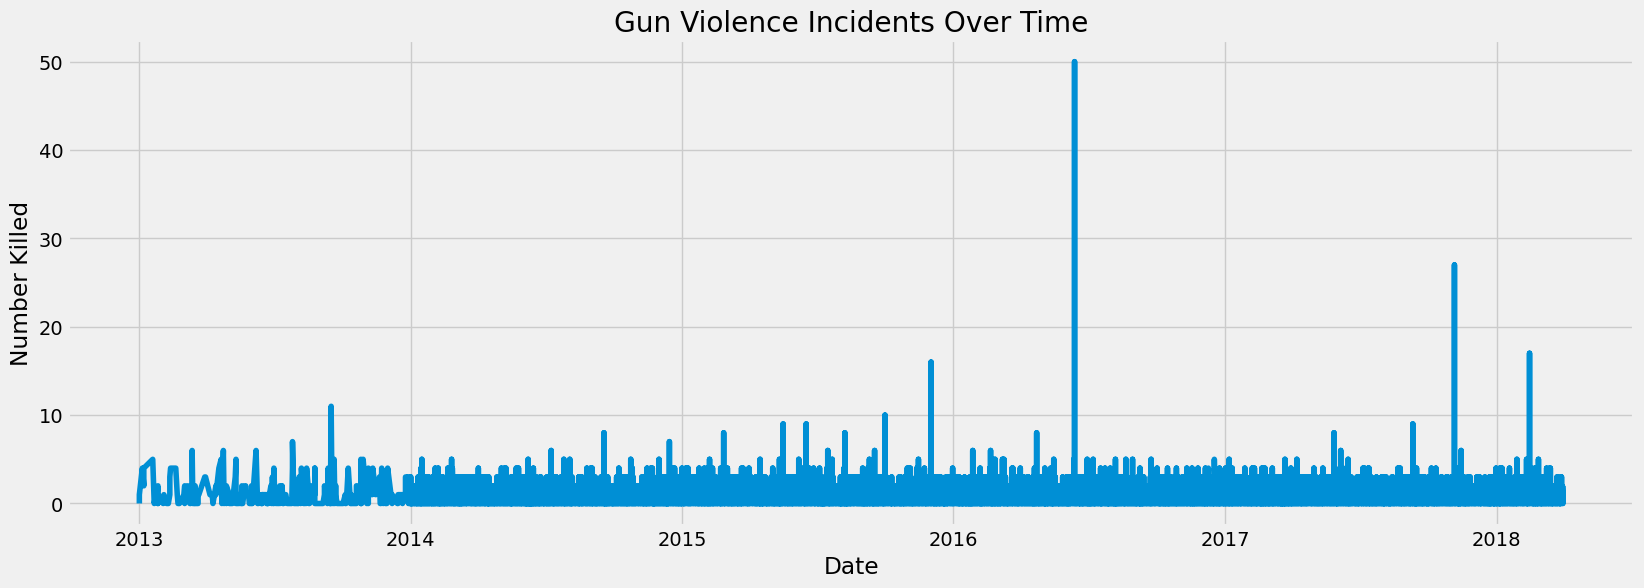

In [24]:
# Plot the number killed and year data

plt.figure(figsize=(18, 6))
plt.plot(gv_df['Number Killed'])
plt.title('Gun Violence Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number Killed')
plt.savefig(os.path.join(path, '04 Visualizations', '6.6_incidents_over_time.png'))
plt.show()

The line looks too condensed. Will try to make the line more visible with few adjustments

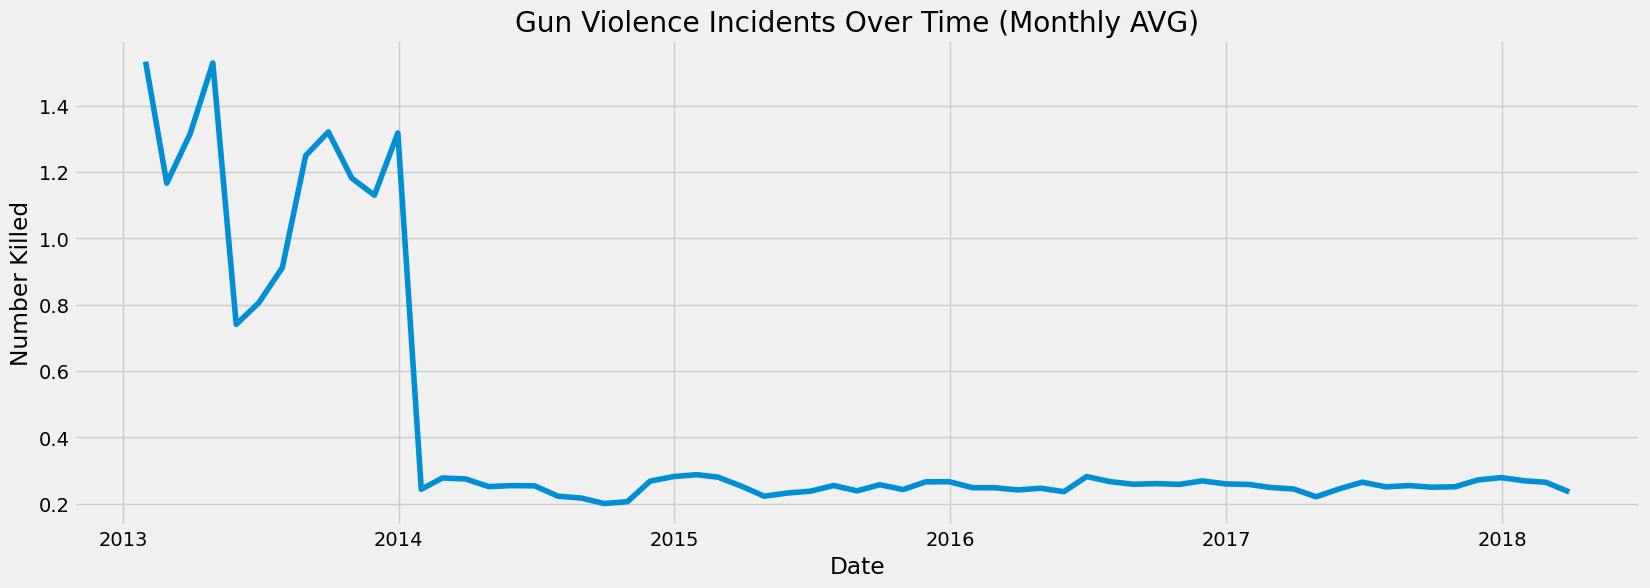

In [26]:
# exclude the non-numeric values
numeric_columns = gv_df.select_dtypes(include=[int, float]).columns

#downsample to monthly averages for numeric columns
monthly_avg = gv_df[numeric_columns].resample('M').mean()

#plot
plt.figure(figsize=(18,6))
plt.plot(monthly_avg['Number Killed'])
plt.title('Gun Violence Incidents Over Time (Monthly AVG)')
plt.xlabel('Date')
plt.ylabel('Number Killed')
plt.savefig(os.path.join(path, '04 Visualizations', '6.6_incidents_over_months_avg.png'))
plt.show()

---

## 04. Decomposition

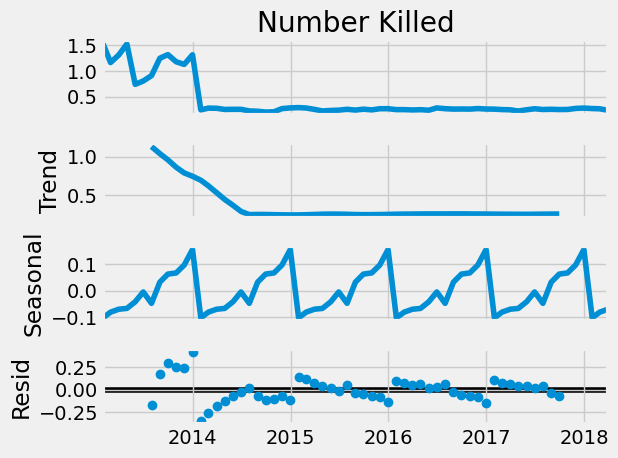

In [29]:
# Decompose the time series using an additive model

result = sm.tsa.seasonal_decompose(monthly_avg['Number Killed'], model='additive')
result.plot()
plt.show()

The trend line indicates a general decrease in the number of people killed from 2013 to 2015, after which it stabilizes and remains relatively constant until 2018.
The seasonal component exhibits a repeating pattern with noticable peaks and troughs, indicating a cyclical trend in the data.
The residuals are scattered around 0, representing the random noise in the data after removing the trend an seasonal components.

---

## 05. Check for Stationarity

In [33]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(gv_df['Number Killed'])

Dickey-Fuller Stationarity test:
Test Statistic                    -47.537863
p-value                             0.000000
Number of Lags Used                82.000000
Number of Observations Used    239594.000000
Critical Value (1%)                -3.430377
Critical Value (5%)                -2.861552
Critical Value (10%)               -2.566776
dtype: float64


The test statistic is significantly lower than the critical values at all significane levels, suggesting strong evidence against the null hypothesis. A p-value of 0 indicates that we can reject the null hypothesis with high confidence, confirming that the time series is indeed stationary. 

---

## 06. Autocorrelation

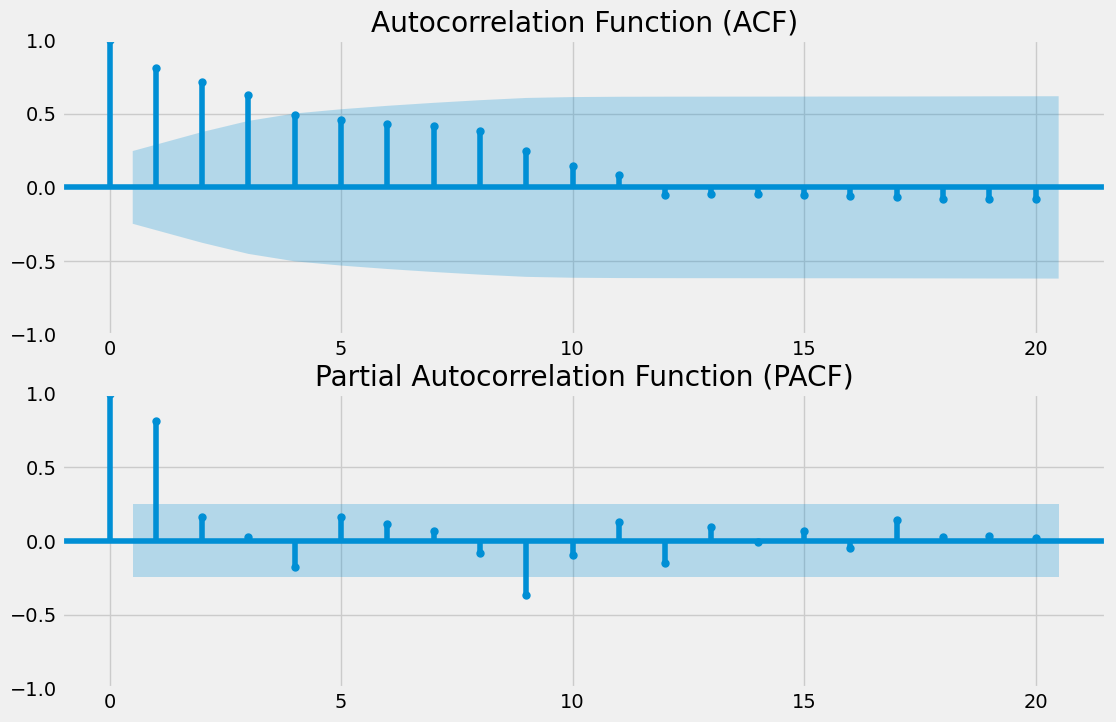

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # importing the autocorrelation and partial correlation plots

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(monthly_avg['Number Killed'].dropna(), lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(monthly_avg['Number Killed'].dropna(), lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

The ACF plot shows significant autocorrelation at the initial lags, which gradually decreases. This pattern suggests that the time series has a persistent structure, with values correlated to their recent past.
The PACF plot shows a significant spike at the first lag, indicating a strong direct relationship with the immediate past values. Subsequent lags fall within the confidence interval, suggesting that the series primarly depends on the immediate previous value and higher-order lag dependencies are less significant.
Both plot support stationarity determined by the Dickey-Fuller Stationary test. 